In [1]:
import pickle
import pandas as pd
import seaborn as sns

import chart_studio.plotly as py

import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
df_bulk = pd.read_csv('../results_nurion/bulk_analysis/df_bulk.csv')
print(df_bulk.columns)
df_bulk

Index(['Unnamed: 0', 'MP_ID', 'formula', 'PREC', 'ALGO', 'ISPIN', 'IMIX',
       'NELM', 'IBRION', 'EDIFF', 'NSW', 'ISIF', 'ENCUT', 'MAGMOM', 'ISMEAR',
       'SIGMA', 'LDAU', 'LDAUU', 'total_E_ref', 'E_atom', 'total_E',
       'cell_param', 'angle', 'Magm_ref', 'Mag_O_ref', 'Magm', 'Mag_O',
       'tot_mag_ref', 'tot_mag', 'DHf_ref', 'DHf', 'Err_DHf', 'Ehull_ref',
       'Eg_ref', 'Eg', 'Volume_ref', 'Volume', 'Err_V_percent', 'Theoretical',
       'VBM', 'E_fermi', 'CBM', 'bgtype', 'bgpath', 'structure'],
      dtype='object')


,Unnamed: 0,MP_ID,formula,PREC,ALGO,ISPIN,IMIX,NELM,IBRION,EDIFF,...,Volume_ref,Volume,Err_V_percent,Theoretical,VBM,E_fermi,CBM,bgtype,bgpath,structure
0,1,mp-12631,SrTcO3,Accurate,Fast,2,4,100,2,2.000000e-06,...,63.149063,62.120127,1.629377,False,NaN,7.155363,NaN,Indirect,NaN,Full Formula (Sr1 Tc1 O3)\nReduced Formula: Sr...
1,2,mp-19035,BaFeO3,Accurate,Fast,2,4,100,2,1.000000e-04,...,65.599300,65.599300,0.000000,False,NaN,3.273222,NaN,Indirect,NaN,Full Formula (Ba1 Fe1 O3)\nReduced Formula: Ba...
2,3,mp-19322,BaMoO3,Accurate,Fast,2,4,100,2,1.000000e-04,...,71.428591,70.763977,0.930459,False,NaN,5.686155,NaN,Indirect,NaN,Full Formula (Ba1 Mo1 O3)\nReduced Formula: Ba...
3,4,mp-3614,KTaO3,Accurate,Fast,2,4,100,2,2.000000e-06,...,65.491714,65.376157,0.176445,False,1.5991,1.844271,3.7071,Indirect,R-gamma,Full Formula (K1 Ta1 O3)\nReduced Formula: KTa...
4,5,mp-3834,BaZrO3,Accurate,Fast,2,4,100,2,1.000000e-07,...,77.074311,76.013819,1.375934,False,3.5638,3.905248,6.6830,Indirect,R-gamma,Full Formula (Ba1 Zr1 O3)\nReduced Formula: Ba...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,mp-1183447,BePdO3,Accurate,Fast,2,4,100,2,2.500000e-04,...,42.818099,42.625752,0.449220,True,NaN,5.658727,NaN,Indirect,NaN,Full Formula (Be1 Pd1 O3)\nReduced Formula: Be...
239,240,mp-1183128,AlVO3,Accurate,Fast,2,4,100,2,2.500000e-04,...,48.248222,48.248222,0.000000,True,NaN,5.766397,NaN,Indirect,NaN,Full Formula (Al1 V1 O3)\nReduced Formula: AlV...
240,241,mp-1183176,AlNiO3,Accurate,Fast,2,4,100,2,2.500000e-04,...,48.942067,48.942067,0.000000,True,NaN,4.628379,NaN,Indirect,NaN,Full Formula (Al1 Ni1 O3)\nReduced Formula: Al...
241,242,mp-977100,NiMoO3,Accurate,Fast,2,4,100,2,2.500000e-04,...,60.589080,59.370598,2.011059,True,NaN,6.028602,NaN,Indirect,NaN,Full Formula (Ni1 Mo1 O3)\nReduced Formula: Ni...


In [4]:
df_bulk.iloc[:,:15]

,Unnamed: 0,MP_ID,formula,PREC,ALGO,ISPIN,IMIX,NELM,IBRION,EDIFF,NSW,ISIF,ENCUT,MAGMOM,ISMEAR
0,1,mp-12631,SrTcO3,Accurate,Fast,2,4,100,2,2.000000e-06,200,3,520,"[0.6, 0.6, 0.6, 0.6, 5.0]",-5
1,2,mp-19035,BaFeO3,Accurate,Fast,2,4,100,2,1.000000e-04,200,3,520,"[0.6, 0.6, 0.6, 5.0, 0.6]",-5
2,3,mp-19322,BaMoO3,Accurate,Fast,2,4,100,2,1.000000e-04,200,3,520,"[0.6, 0.6, 0.6, 5.0, 0.6]",-5
3,4,mp-3614,KTaO3,Accurate,Fast,2,4,100,2,2.000000e-06,200,3,520,"[0.6, 0.6, 0.6, 0.6, 5.0]",-5
4,5,mp-3834,BaZrO3,Accurate,Fast,2,4,100,2,1.000000e-07,99,3,700,"[0.0, 0.0, 0.0, 0.0, 0.0]",-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,mp-1183447,BePdO3,Accurate,Fast,2,4,100,2,2.500000e-04,99,3,520,"[0.6, 0.6, 0.6, 0.6, 0.6]",-5
239,240,mp-1183128,AlVO3,Accurate,Fast,2,4,100,2,2.500000e-04,99,3,520,"[0.6, 5.0, 0.6, 0.6, 0.6]",-5
240,241,mp-1183176,AlNiO3,Accurate,Fast,2,4,100,2,2.500000e-04,99,3,520,"[0.6, 5.0, 0.6, 0.6, 0.6]",-5
241,242,mp-977100,NiMoO3,Accurate,Fast,2,4,100,2,2.500000e-04,99,3,520,"[5, 5, 0.6, 0.6, 0.6]",0


In [5]:
df_bulk.iloc[:,15:30]

,SIGMA,LDAU,LDAUU,total_E_ref,E_atom,total_E,cell_param,angle,Magm_ref,Mag_O_ref,Magm,Mag_O,tot_mag_ref,tot_mag,DHf_ref
0,0.05,NaN,NaN,-37.100116,-7.420023,-37.322174,"(3.982193, 3.982193, 3.982193)","(90.0, 90.0, 90.0)","[0.0, 0.047, 0.004, 0.001, 0.007]",NM,"[-0.0, 0.0, -0.0, 0.0, -0.0]",NM,0.073733,0.0000,-2.462604
1,0.05,True,"[0.0, 5.3, 0.0]",-31.632426,-6.326485,-31.430283,"(4.033045, 4.033045, 4.033045)","(90.0, 90.0, 90.0)","[-0.004, -4.073, -0.103, -0.029, -0.006]",FM,"[0.003, 4.046, 0.124, 0.06, 0.039]",FM,4.289056,4.3596,-2.248032
2,0.05,True,"[0.0, 4.38, 0.0]",-34.932173,-6.986435,-35.036352,"(4.14913304, 4.14913304, 4.14913304)","(90.0, 90.0, 90.0)",NaN,Unknown,"[-0.002, 1.991, -0.01, -0.025, -0.021]",FM,2.000000,2.0000,-2.592314
3,0.05,NaN,NaN,-41.139120,-8.227824,-41.068797,"(4.030839, 4.030839, 4.030839)","(90.0, 90.0, 90.0)","[0.0, -0.0, 0.0, -0.0, 0.0]",NM,"[-0.0, 0.0, -0.0, -0.0, -0.0]",NM,0.000088,0.0000,-3.086789
4,0.05,NaN,NaN,-41.444713,-8.288943,-41.725654,"(4.255689, 4.255689, 4.255689)","(90.0, 90.0, 90.0)","[0.0, -0.0, -0.0, -0.0, -0.0]",NM,"[0.0, 0.0, -0.0, -0.0, -0.0]",NM,0.001633,-0.0000,-3.648209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.05,NaN,NaN,-25.952535,-5.190507,-26.011596,"(3.498451, 3.498451, 3.498451)","(90.0, 90.0, 90.0)","[0.0, -0.0, -0.0, 0.001, -0.001]",NM,"[-0.0, 0.0, 0.0, 0.0, 0.0]",NM,0.001767,0.0000,-0.859928
239,0.05,True,"[0, 3.25, 0]",-34.518638,-6.903728,-35.089020,"(3.640495, 3.640495, 3.640495)","(90.0, 90.0, 90.0)","[0.007, 2.483, -0.201, -0.277, -0.174]",FiM,"[0.001, 2.08, -0.054, -0.06, -0.063]",FM,2.000440,2.0000,-2.127142
240,0.05,True,"[0, 6.2, 0]",-26.699876,-5.339975,-26.349190,"(3.657863, 3.657863, 3.657863)","(90.0, 90.0, 90.0)","[-0.013, 1.704, 0.3, 0.468, 0.41]",FM,"[-0.013, 1.687, 0.309, 0.471, 0.413]",FM,2.999520,3.0000,-1.320296
241,0.20,True,"[6.2, 4.38, 0]",-26.780958,-5.356192,-27.487986,"(3.927638, 3.927638, 3.927638)","(90.0, 90.0, 90.0)","[0.001, 0.002, -0.0, -0.0, -0.0]",NM,"[1.126, 1.15, -0.007, 0.009, -0.098]",FM,0.000663,2.1760,-0.622701


In [6]:
df_bulk.iloc[:,30:]

,DHf,Err_DHf,Ehull_ref,Eg_ref,Eg,Volume_ref,Volume,Err_V_percent,Theoretical,VBM,E_fermi,CBM,bgtype,bgpath,structure
0,-2.530109,0.067505,0.000000,0.0000,0.0000,63.149063,62.120127,1.629377,False,NaN,7.155363,NaN,Indirect,NaN,Full Formula (Sr1 Tc1 O3)\nReduced Formula: Sr...
1,-2.262969,0.014936,0.000000,0.0000,0.0000,65.599300,65.599300,0.000000,False,NaN,3.273222,NaN,Indirect,NaN,Full Formula (Ba1 Fe1 O3)\nReduced Formula: Ba...
2,-2.610795,0.018481,0.000000,0.0000,0.0000,71.428591,70.763977,0.930459,False,NaN,5.686155,NaN,Indirect,NaN,Full Formula (Ba1 Mo1 O3)\nReduced Formula: Ba...
3,-3.106766,0.019976,0.000000,2.1532,2.1080,65.491714,65.376157,0.176445,False,1.5991,1.844271,3.7071,Indirect,R-gamma,Full Formula (K1 Ta1 O3)\nReduced Formula: KTa...
4,-3.722781,0.074571,0.000000,3.4102,3.1192,77.074311,76.013819,1.375934,False,3.5638,3.905248,6.6830,Indirect,R-gamma,Full Formula (Ba1 Zr1 O3)\nReduced Formula: Ba...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,-0.871869,0.011941,0.827586,0.0000,0.0000,42.818099,42.625752,0.449220,True,NaN,5.658727,NaN,Indirect,NaN,Full Formula (Be1 Pd1 O3)\nReduced Formula: Be...
239,-2.276248,0.149106,0.854966,0.0000,0.0000,48.248222,48.248222,0.000000,True,NaN,5.766397,NaN,Indirect,NaN,Full Formula (Al1 V1 O3)\nReduced Formula: AlV...
240,-1.318582,-0.001714,0.818685,0.0000,0.0000,48.942067,48.942067,0.000000,True,NaN,4.628379,NaN,Indirect,NaN,Full Formula (Al1 Ni1 O3)\nReduced Formula: Al...
241,-0.817951,0.195250,1.074430,0.0000,0.0000,60.589080,59.370598,2.011059,True,NaN,6.028602,NaN,Indirect,NaN,Full Formula (Ni1 Mo1 O3)\nReduced Formula: Ni...


In [7]:
df_bulk.columns

Index(['Unnamed: 0', 'MP_ID', 'formula', 'PREC', 'ALGO', 'ISPIN', 'IMIX',
       'NELM', 'IBRION', 'EDIFF', 'NSW', 'ISIF', 'ENCUT', 'MAGMOM', 'ISMEAR',
       'SIGMA', 'LDAU', 'LDAUU', 'total_E_ref', 'E_atom', 'total_E',
       'cell_param', 'angle', 'Magm_ref', 'Mag_O_ref', 'Magm', 'Mag_O',
       'tot_mag_ref', 'tot_mag', 'DHf_ref', 'DHf', 'Err_DHf', 'Ehull_ref',
       'Eg_ref', 'Eg', 'Volume_ref', 'Volume', 'Err_V_percent', 'Theoretical',
       'VBM', 'E_fermi', 'CBM', 'bgtype', 'bgpath', 'structure'],
      dtype='object')

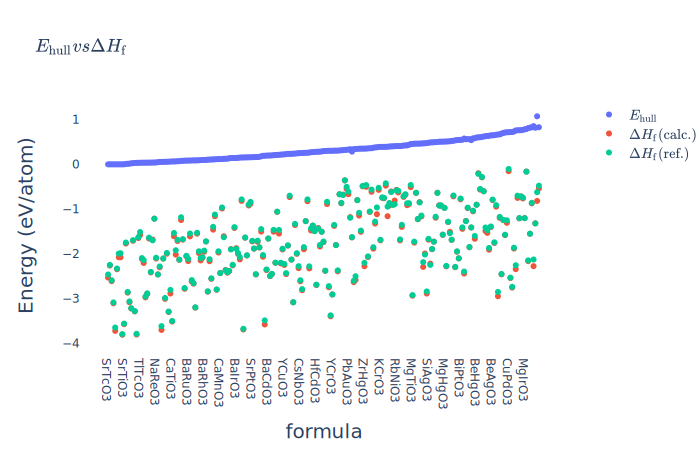

In [12]:
fig = make_subplots(rows=1, cols =1, shared_xaxes = True)

fig.add_trace(go.Scatter(x = df_bulk['formula'], y = df_bulk['Ehull_ref'], name = r'$ E_{\text{hull}}$', mode = 'markers'))
fig.add_trace(go.Scatter(x = df_bulk['formula'], y = df_bulk['DHf'], name = r'$\Delta H_{\text{f}} \text{(calc.)}$', mode = 'markers' ))
fig.add_trace(go.Scatter(x = df_bulk['formula'], y = df_bulk['DHf_ref'], name = r'$\Delta H_{\text{f}} \text{(ref.)}$', mode = 'markers' ))

fig.update_xaxes(title_text = 'formula',  titlefont = dict(size = 20),
          #       tickfont = dict(size=18),
                   zeroline = False,
                   gridwidth = 1)

fig.update_yaxes(title_text = 'Energy (eV/atom)',  titlefont = dict(size = 20),
                 # tickfont = dict(size=10),
                   zeroline = False,
                   gridwidth = 1)

fig.update_layout(title = r'$ E_{\text{hull}} vs \Delta H_{\text{f}}$',plot_bgcolor = 'white')

# pyo.iplot(fig)
fig.show("svg")
# py.iplot(fig, filename = 'ehull_DHf')
# fig.write_html('Ehull_DHf.html')

In [13]:
df_bulk.columns

Index(['Unnamed: 0', 'MP_ID', 'formula', 'PREC', 'ALGO', 'ISPIN', 'IMIX',
       'NELM', 'IBRION', 'EDIFF', 'NSW', 'ISIF', 'ENCUT', 'MAGMOM', 'ISMEAR',
       'SIGMA', 'LDAU', 'LDAUU', 'total_E_ref', 'E_atom', 'total_E',
       'cell_param', 'angle', 'Magm_ref', 'Mag_O_ref', 'Magm', 'Mag_O',
       'tot_mag_ref', 'tot_mag', 'DHf_ref', 'DHf', 'Err_DHf', 'Ehull_ref',
       'Eg_ref', 'Eg', 'Volume_ref', 'Volume', 'Err_V_percent', 'Theoretical',
       'VBM', 'E_fermi', 'CBM', 'bgtype', 'bgpath', 'structure'],
      dtype='object')

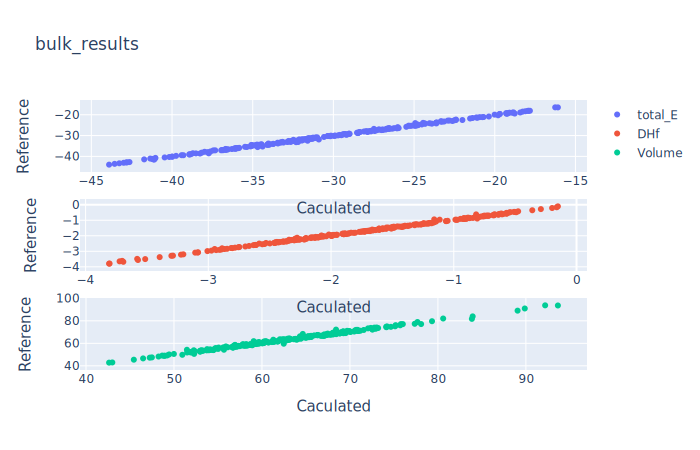

In [15]:
fig = make_subplots(rows = 3, cols = 1)

fig.add_trace(go.Scatter(x = df_bulk['total_E'], y = df_bulk['total_E_ref'], name = 'total_E', mode = 'markers'),
             row = 1, col = 1)
fig.update_xaxes(title_text = 'Caculated', titlefont = dict(size = 15))
fig.update_yaxes(title_text = 'Reference', titlefont = dict(size = 15))

fig.add_trace(go.Scatter(x = df_bulk['DHf'], y = df_bulk['DHf_ref'], name = 'DHf', mode = 'markers'),
             row = 2, col = 1)
fig.add_trace(go.Scatter(x = df_bulk['Volume'], y = df_bulk['Volume_ref'], name = 'Volume', mode = 'markers'),
             row = 3, col = 1)
go.Scatter
fig.update_layout(height = 1000, width = 400, title_text = 'bulk_results')
fig.show("svg")
# py.iplot(fig, filename = 'bulk_results')

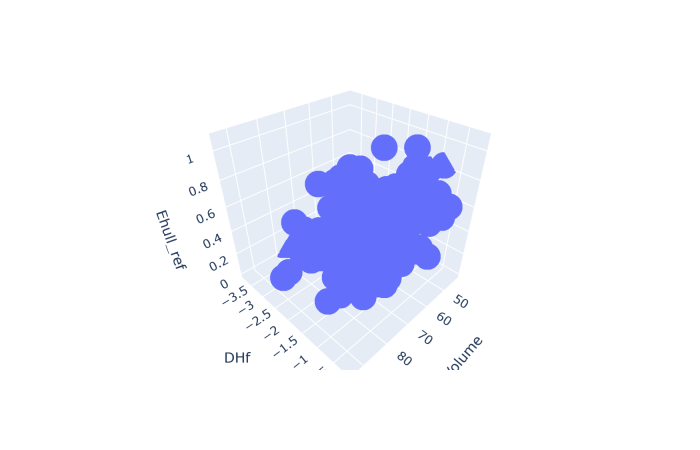

In [16]:
fig = px.scatter_3d(df_bulk, x = 'Volume', y = 'DHf', z = 'Ehull_ref')
# py.iplot(fig)
fig.show("svg")

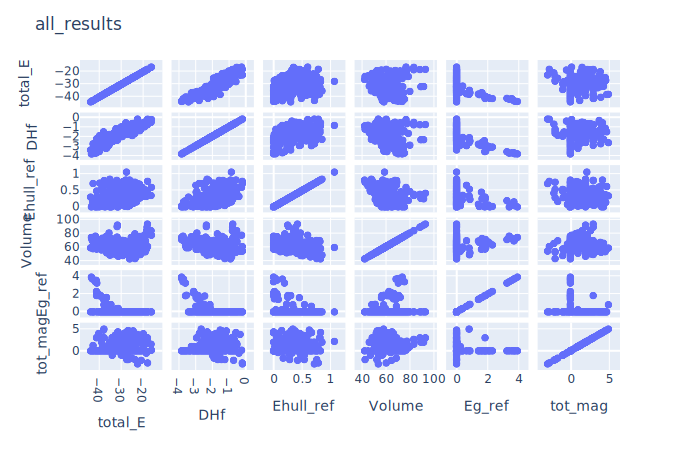

In [17]:
fig = px.scatter_matrix(df_bulk, 
                        dimensions = ['total_E', 'DHf', 'Ehull_ref','Volume', 'Eg_ref', 'tot_mag'])
fig.update_layout(height = 1000, width = 1000, title_text = 'all_results')

# py.iplot(fig, filename = "scatter_matrix")
fig.show("svg")

In [18]:
df_Asite = pd.read_csv('../results_nurion/bulk_analysis/df_Asite.csv')

column_list = list(df_Asite.columns.values)
column_list[0] = 'index'
df_Asite.columns = column_list

df_Asite

,index,formula_Na,total_E_Na,tot_mag_Na,DHf_Na,Ehull_ref_Na,Eg_Na,Volume_Na,formula_K,total_E_K,...,Ehull_ref_Sr,Eg_Sr,Volume_Sr,formula_Ba,total_E_Ba,tot_mag_Ba,DHf_Ba,Ehull_ref_Ba,Eg_Ba,Volume_Ba
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,62.120127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BaFeO3,-31.430283,4.3596,-2.262969,0.0,NaN,65.599300
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BaMoO3,-35.036352,2.0000,-2.610795,0.0,NaN,70.763977
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KTaO3,-41.068797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BaZrO3,-41.725654,-0.0000,-3.722781,0.0,NaN,76.013819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_Asite.columns

Index(['index', 'formula_Na', 'total_E_Na', 'tot_mag_Na', 'DHf_Na',
       'Ehull_ref_Na', 'Eg_Na', 'Volume_Na', 'formula_K', 'total_E_K',
       'tot_mag_K', 'DHf_K', 'Ehull_ref_K', 'Eg_K', 'Volume_K', 'formula_Rb',
       'total_E_Rb', 'tot_mag_Rb', 'DHf_Rb', 'Ehull_ref_Rb', 'Eg_Rb',
       'Volume_Rb', 'formula_Cs', 'total_E_Cs', 'tot_mag_Cs', 'DHf_Cs',
       'Ehull_ref_Cs', 'Eg_Cs', 'Volume_Cs', 'formula_Mg', 'total_E_Mg',
       'tot_mag_Mg', 'DHf_Mg', 'Ehull_ref_Mg', 'Eg_Mg', 'Volume_Mg',
       'formula_Ca', 'total_E_Ca', 'tot_mag_Ca', 'DHf_Ca', 'Ehull_ref_Ca',
       'Eg_Ca', 'Volume_Ca', 'formula_Sr', 'total_E_Sr', 'tot_mag_Sr',
       'DHf_Sr', 'Ehull_ref_Sr', 'Eg_Sr', 'Volume_Sr', 'formula_Ba',
       'total_E_Ba', 'tot_mag_Ba', 'DHf_Ba', 'Ehull_ref_Ba', 'Eg_Ba',
       'Volume_Ba'],
      dtype='object')

## 1. A-site elements (formation enthalpy)

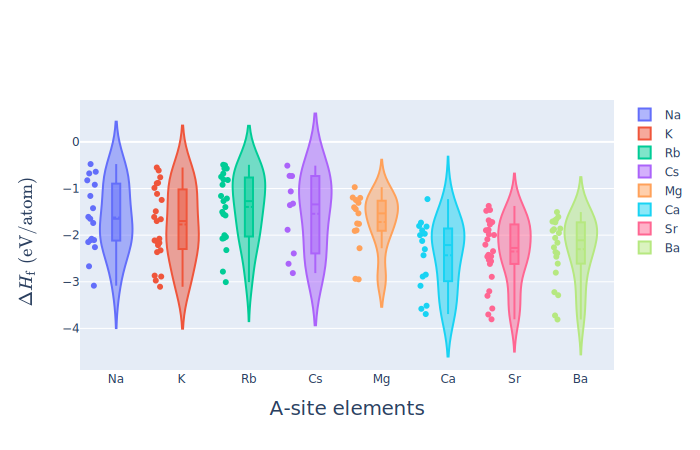

In [20]:
fig = go.Figure()

Asite_elements = ['Na', 'K', 'Rb', 'Cs', 'Mg', 'Ca', 'Sr', 'Ba']

DHf_list = []
total_E_list = []
tot_mag_list = []
Ehull_list = []
Eg_list = []
Volume_list = []

for Asite_element in Asite_elements:
    DHf = df_Asite['DHf_%s' % (Asite_element)]
    DHf_list.append(DHf)
    
    total_E = df_Asite['total_E_%s' % (Asite_element)]
    total_E_list.append(total_E)
    
    tot_mag = df_Asite['tot_mag_%s' % (Asite_element)]
    tot_mag_list.append(tot_mag)
    
    Ehull = df_Asite['Ehull_ref_%s' % (Asite_element)]
    Ehull_list.append(Ehull)
    
    Eg = df_Asite['Eg_%s' % (Asite_element)]
    Eg_list.append(Eg)
    
    Volume = df_Asite['Volume_%s' % (Asite_element)]
    Volume_list.append(Volume)
        
properties = [DHf_list, total_E_list, tot_mag_list, Ehull_list, Eg_list, Volume_list]
        
for idx in range(len(Asite_elements)):
    fig.add_trace(go.Violin(y = DHf_list[idx], name = Asite_elements[idx],
                           box_visible = True, meanline_visible = True,
                           points = 'all', scalemode = 'count'))
fig.update_xaxes(title_text = 'A-site elements', titlefont = dict(size = 20))
fig.update_yaxes(title_text = r'$\Delta H_\text{f} \text{ (eV/atom)}$', titlefont = dict(size = 20))
    
fig.show("svg")


## 2. A-site elements (total magnetization)

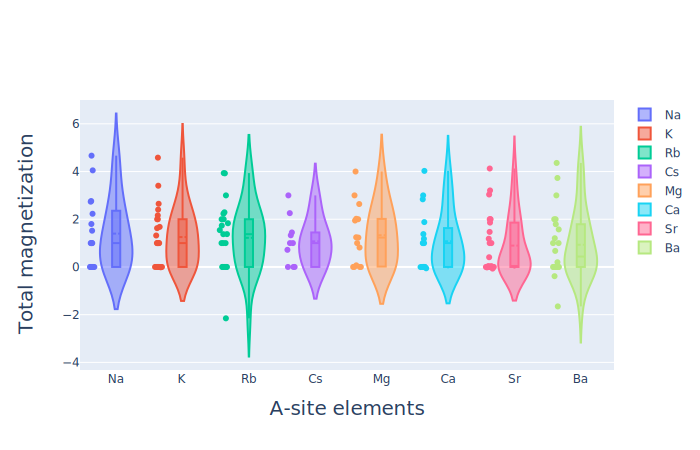

In [21]:
fig = go.Figure()
for idx in range(len(Asite_elements)):
    fig.add_trace(go.Violin(y = tot_mag_list[idx], name = Asite_elements[idx],
                           box_visible = True, meanline_visible = True, points = 'all', 
                           scalemode = 'count'))
fig.update_xaxes(title_text = 'A-site elements', titlefont = dict(size = 20))
fig.update_yaxes(title_text = 'Total magnetization', titlefont = dict(size = 20))
fig.show("svg")

## 3. A-site elements (Energy above hull)

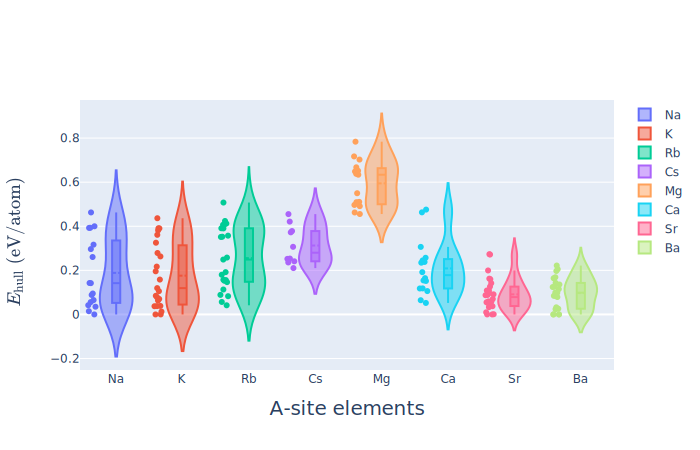

In [22]:
fig = go.Figure()
for idx in range(len(Asite_elements)):
    fig.add_trace(go.Violin(y = Ehull_list[idx], name = Asite_elements[idx],
                           box_visible = True, meanline_visible = True, points = 'all'))

fig.update_xaxes(title_text = 'A-site elements', titlefont = dict(size = 20))
fig.update_yaxes(title_text = r'$ E_\text{hull} \text{ (eV/atom)}$', titlefont = dict(size = 20))
fig.show("svg")

## 4. A-site elements (Volume)

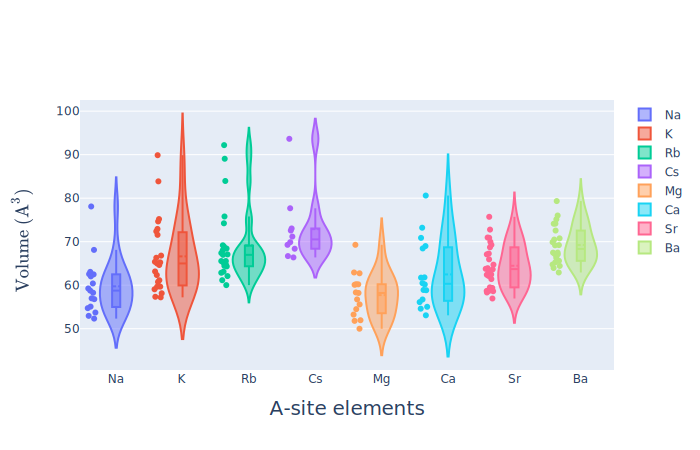

In [23]:
fig = go.Figure()
for idx in range(len(Asite_elements)):
    fig.add_trace(go.Violin(y = Volume_list[idx], name = Asite_elements[idx],
                           box_visible = True, meanline_visible = True, points = 'all'))

fig.update_xaxes(title_text = 'A-site elements', titlefont = dict(size = 20))
fig.update_yaxes(title_text = r'$ \text{Volume (A}^\text{3} \text{)}$', titlefont = dict(size = 20))
fig.show("svg")